In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#usunięto ostatni rząd
df_source = pd.read_excel('ie_data.xlsx',sheet_name='Data', header=7, usecols=['Date','CAPE', 'Rate GS10', 'CPI', 'P', 'D', 'E'], parse_dates=True, index_col='Date')
df_source = df_source.dropna()
df_source.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1710 entries, 1881-01-01 to 2023-06-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P          1710 non-null   float64
 1   D          1710 non-null   float64
 2   E          1710 non-null   float64
 3   CPI        1710 non-null   float64
 4   Rate GS10  1710 non-null   float64
 5   CAPE       1710 non-null   float64
dtypes: float64(6)
memory usage: 93.5 KB


In [71]:
df_source.tail(20)

,P,D,E,CPI,Rate GS10,CAPE
Date,,,,,,
2021-11-01,4667.386667,60.016239,190.390000,277.948,1.56,38.582627
2021-12-01,4674.772727,60.397117,197.870000,278.802,1.47,38.304850
2022-01-01,4573.815500,60.921403,197.883333,281.148,1.76,36.936758
2022-02-01,4435.980526,61.445689,197.896667,283.716,1.93,35.287149
2022-03-01,4391.265217,61.969974,197.910000,287.504,2.13,34.270799
2022-04-01,4391.296000,62.653316,196.026667,289.109,2.75,33.889165
2022-05-01,4040.360000,63.336658,194.143333,292.296,2.90,30.673155
2022-06-01,3898.946667,64.020000,192.260000,296.311,3.14,29.047721
2022-07-01,3911.729500,64.452768,190.583333,296.276,2.90,29.004618


1.9919736118746563

In [111]:
data = pd.DataFrame({})
data['Price'] = df_source['P']
data['cape_inv'] = 1/df_source['CAPE']
data['cpi'] = df_source['CPI'].pct_change(periods=12)
data['eqvol'] = df_source['P'].pct_change().rolling(12).std()
data['bndyvol'] = df_source['Rate GS10'].rolling(12).std()
data['epsgr'] = df_source['E']/df_source['E'].shift(360)
data['por'] = df_source['D']/df_source['E']
data['D'] = 0

#var_exog = np.log(var_exog)
np.round(data.tail(10),3)

,Price,cape_inv,cpi,eqvol,bndyvol,epsgr,por,D
Date,,,,,,,,
2022-09-01,3850.520,0.035,0.082,0.042,0.714,10.379,0.349,0
2022-01-01,3726.051,0.037,0.077,0.042,0.801,9.919,0.361,0
2022-11-01,3917.489,0.035,0.071,0.043,0.814,9.476,0.374,0
2022-12-01,3912.381,0.035,0.065,0.043,0.734,9.049,0.387,0
2023-01-01,3960.656,0.035,0.064,0.043,0.646,8.974,0.388,0
2023-02-01,4079.685,0.035,0.060,0.044,0.553,8.901,0.389,0
2023-03-01,3968.559,0.036,0.049,0.045,0.435,8.829,0.389,0
2023-04-01,4121.467,0.035,0.049,0.047,0.387,9.007,0.386,0
2023-05-01,4146.173,0.035,0.040,0.040,0.349,9.188,0.383,0


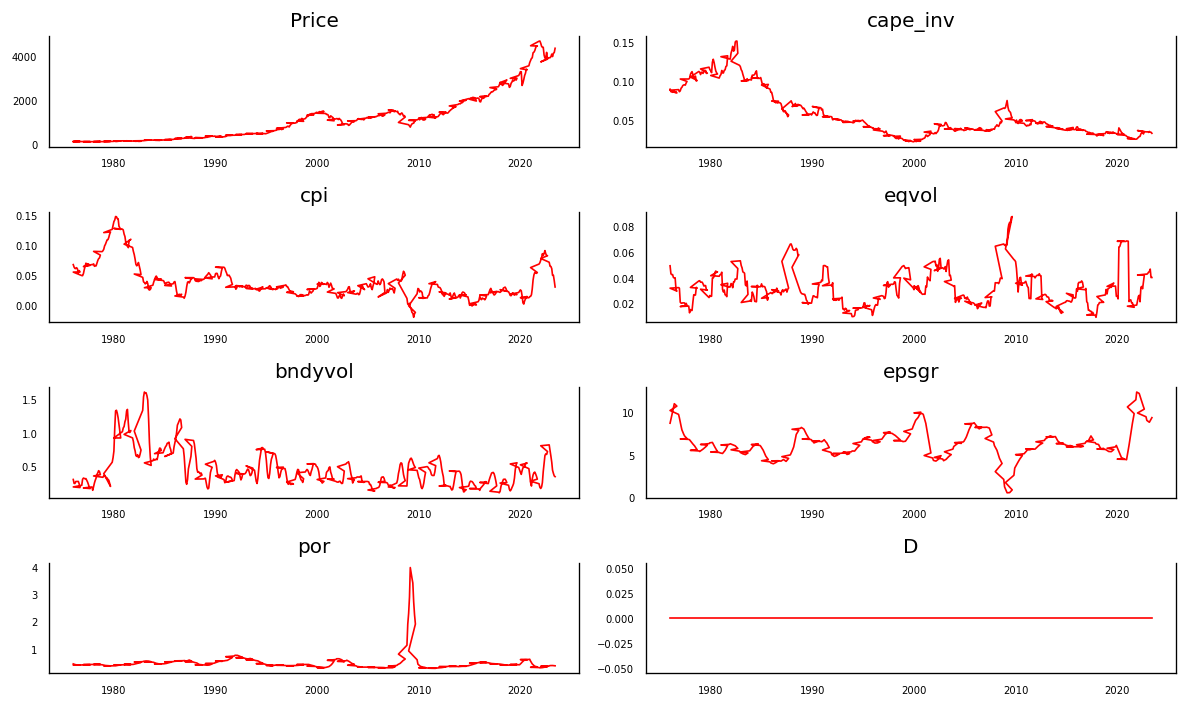

In [114]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data1 = data['1976-01-01':][data.columns[i]]
    ax.plot(data1, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


var_exog: 
- cape_inv: 1/cape 
- r10yb: - Real 10-year bond yields (nominal yeld-expected inflation)
- cpi: Year-over-year CPI inflation rate
- eqvol: Realized S&P500 price volatility, over trailing 12 months,
- bndyvol: Realized volatility of changes in our real bond yield series, over trailing 12 months
'epsgr' - 10 year earnings return
por - pay-ot ratio

price - delta earngs + diwident yeld + delta valuation

In [85]:
exog_variables = ['cape_inv','r10yb','cpi','eqvol','bndyvol']